In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

아버지와 아들의 키 - Galton

In [7]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt',sep='\t')
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4


* 아버지의 키 아들의 키 발췌
* 컬럼명을 Father, Son 변경
* 단위 (inch --> cm)

In [10]:
#filtering : 아들키
df = df[df.Gender=='M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [12]:
#Father와 height만 선택
df = df[['Father','Height']]
df.head()

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [13]:
#컬럼명 변경
df.columns=['Father','Son']

In [14]:
df = df * 2.54
df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


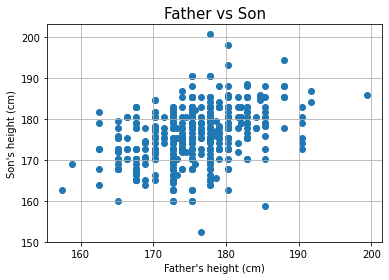

In [18]:
plt.scatter(df.Father,df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son',fontsize=15)
plt.show()

In [21]:
weight,bias = np.polyfit(df.Father,df.Son,1)
weight,bias

(0.447747917603028, 97.17763700739309)

In [22]:
np.polyfit(df.Father,df.Son,2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [23]:
xs=np.array([156,201])
ys=xs * weight + bias
ys

array([167.02631215, 187.17496845])

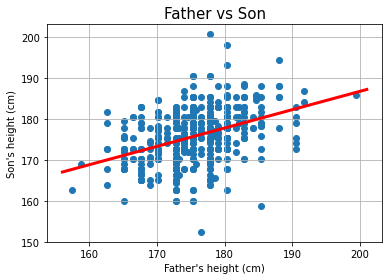

In [24]:
plt.scatter(df.Father,df.Son)
plt.plot(xs,ys,'r-',lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son',fontsize=15)
plt.show()

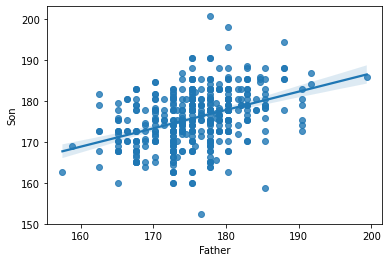

In [25]:
import seaborn as sns
sns.regplot(x='Father',y='Son',data=df)

* sklearn 회귀식 구하기

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
df.shape

(465, 2)

In [29]:
#학습
lr.fit(df[['Father']],df.Son)

LinearRegression()

In [30]:
lr.fit(df.Father.values.reshape(-1,1),df.Son.values)

LinearRegression()

In [31]:
#coefficents(계수),weight
lr.coef_

array([0.44774792])

In [32]:
#intercept(절편),bias
lr.intercept_

97.17763700739341

In [33]:
#잔차 제곱의 합(RSS : Residual Sum of Square)
lr._residues

17556.59951549399

In [34]:
#평가 R2 (squared)
lr.score(df.Father.values.reshape(-1,1),df.Son.values)

0.15312927478307048

In [35]:
from sklearn.metrics import r2_score
pred=lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.Son.values,pred)

0.15312927478307048

당뇨병 사례

In [36]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [38]:
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [39]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


* 10개 Feature와 target간의 상관관계도 

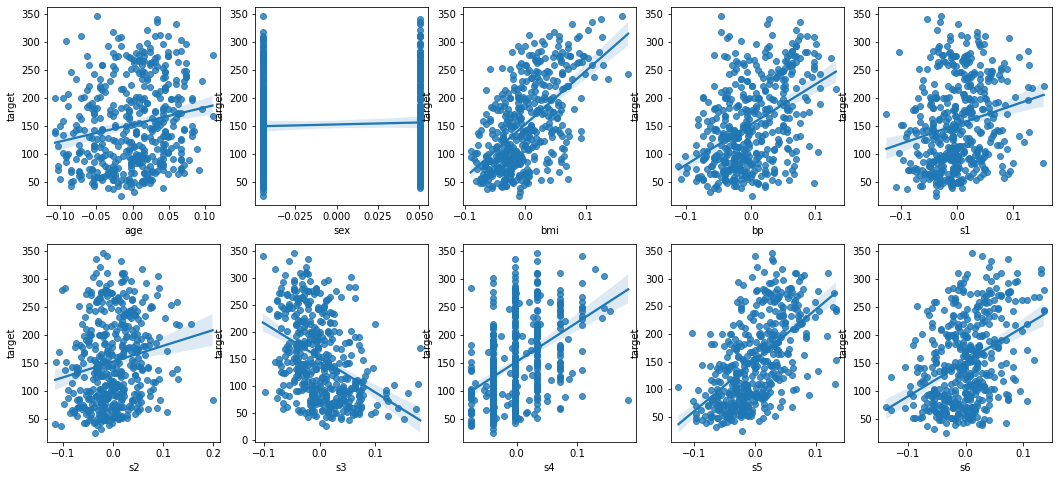

In [44]:
import seaborn as sns
_, axs = plt.subplots(2,5,figsize=(18,8))
for i,feature in enumerate(df.columns[:-1]):
  row,col = i//5, i%5
  sns.regplot(x=feature,y='target',data=df, ax=axs[row][col])

* feature vs target

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [47]:
for feature in df.columns[:-1]:
  X = df[feature].values.reshape(-1,1)
  lr.fit(X,diabetes.target)
  score = lr.score(X,diabetes.target)
  print(f'{feature} : score: {score:.4f}')

age : score: 0.0353
sex : score: 0.0019
bmi : score: 0.3439
bp : score: 0.1949
s1 : score: 0.0450
s2 : score: 0.0303
s3 : score: 0.1559
s4 : score: 0.1853
s5 : score: 0.3202
s6 : score: 0.1463


* BMI vs target
 - 훈련/테스트 데이터셋 분리(test_size=0.1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(df.bmi.values.reshape(-1,1),diabetes.target,test_size=0.1,random_state=2022)
X_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
#계수, 절편, 잔차제곱의합 
lr.coef_, lr.intercept_, lr._residues

(array([939.55896022]), 151.79247763803028, 1578990.0125372214)

In [53]:
from sklearn.metrics import r2_score
pred = lr.predict(x_test)
r2_score(y_test,pred)

0.46955604545525564

In [59]:
lr.score(x_test,y_test)

0.46955604545525564

In [55]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mse, rmse

(3127.5719491232653, 55.92469891848561)

* 시각화

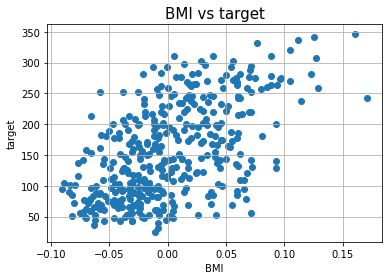

In [56]:
plt.scatter(X_train,y_train)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('BMI vs target',fontsize=15)
plt.show()

In [60]:
xs = np.array([-0.1,0.18])
ys = xs * lr.coef_[0] + lr.intercept_
ys

array([ 57.83658162, 320.91309048])

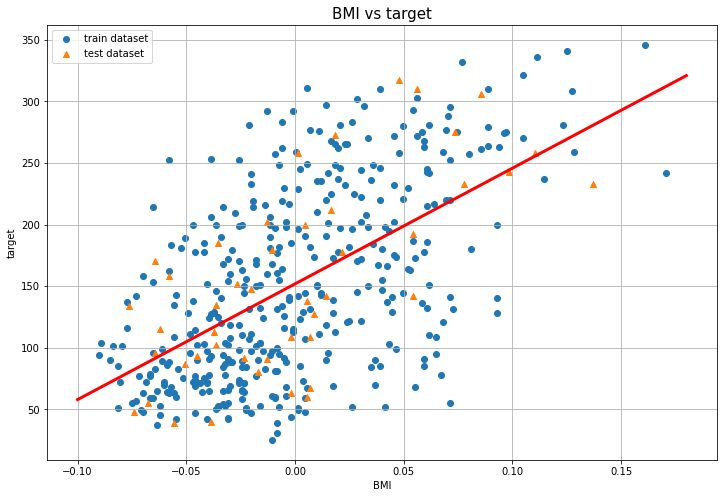

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(X_train,y_train,label='train dataset')
plt.scatter(x_test,y_test,marker='^',label='test dataset')
plt.plot(xs,ys,'r-',lw=3)
plt.grid()
plt.legend()
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('BMI vs target',fontsize=15)
plt.show()

BMI -> bp vs target